Nama: Annaura Zyra Alifa W
---
NIM: 2602205540
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Bank_Loan_Granting.csv')

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [3]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **1. Preprocessing Step**

Pertama, dalam variabel 'CCAvg' terdapat kejanggalan tipe data. maka pada proses ini tanda '/' akan diubah menjadi '.' atau pecahan menjadi desimal. Mengkonversi data 'CCAvg' membantu memastikan bahwa model atau analisis yang akan dilakukan tidak terpengaruh oleh data yang tidak konsisten atau salah format.

In [5]:
df['CCAvg'].unique()

array(['1/60', '1/50', '1/00', '2/70', '0/40', '0/30', '0/60', '8/90',
       '2/40', '0/10', '3/80', '2/50', '2/00', '4/70', '8/10', '0/50',
       '0/90', '1/20', '0/70', '3/90', '0/20', '2/20', '3/30', '1/80',
       '2/90', '1/40', '5/00', '2/30', '1/10', '5/70', '4/50', '2/10',
       '8/00', '1/70', '0/00', '2/80', '3/50', '4/00', '2/60', '1/30',
       '5/60', '5/20', '3/00', '4/60', '3/60', '7/20', '1/75', '7/40',
       '2/67', '7/50', '6/50', '7/80', '7/90', '4/10', '1/90', '4/30',
       '6/80', '5/10', '3/10', '0/80', '3/70', '6/20', '0/75', '2/33',
       '4/90', '0/67', '3/20', '5/50', '6/90', '4/33', '7/30', '4/20',
       '4/40', '6/10', '6/33', '6/60', '5/30', '3/40', '7/00', '6/30',
       '8/30', '6/00', '1/67', '8/60', '7/60', '6/40', '10/00', '5/90',
       '5/40', '8/80', '1/33', '9/00', '6/70', '4/25', '6/67', '5/80',
       '4/80', '3/25', '5/67', '8/50', '4/75', '4/67', '3/67', '8/20',
       '3/33', '5/33', '9/30', '2/75'], dtype=object)

In [6]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype(float)
df['CCAvg'].head(), df['CCAvg'].describe()

(0    1.6
 1    1.5
 2    1.0
 3    2.7
 4    1.0
 Name: CCAvg, dtype: float64,
 count    5000.000000
 mean        1.937938
 std         1.747659
 min         0.000000
 25%         0.700000
 50%         1.500000
 75%         2.500000
 max        10.000000
 Name: CCAvg, dtype: float64)

In [7]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

Pada data experience terdapat nilai minus, yang mana pada pengalaman kerja tidak mungkin bernilai minus. maka dari itu, nilai minus pada 'Experience' harus diganti oleh mediannya.

In [8]:
overall_median_experience = df[df['Experience'] >= 0]['Experience'].median()
df['Experience'] = df['Experience'].apply(lambda x: overall_median_experience if x < 0 else x)

(df['Experience'] < 0).sum(), df['Experience'].describe()

(0,
 count    5000.000000
 mean       20.327600
 std        11.253035
 min         0.000000
 25%        11.000000
 50%        20.000000
 75%        30.000000
 max        43.000000
 Name: Experience, dtype: float64)

Data Education merupakan data categorical, maka dari itu perlu encoding untuk mengubah datanya menjadi numerical

In [9]:
education_encoded = pd.get_dummies(df['Education'], prefix='Education')
data_encoded = df.join(education_encoded)

print(data_encoded.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25         1.0      49     91107       4    1.6          1         0   
1   2   45        19.0      34     90089       3    1.5          1         0   
2   3   39        15.0      11     94720       1    1.0          1         0   
3   4   35         9.0     100     94112       1    2.7          2         0   
4   5   35         8.0      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Education_1  Education_2  Education_3  
0         True        False        False  


#  **2.Explorasi Data**

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.327600    73.774200  93152.503000   
std    1443.520003    11.463166    11.253035    46.033729   2121.852197   
min       1.000000    23.000000     0.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    11.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

<Figure size 1200x600 with 0 Axes>

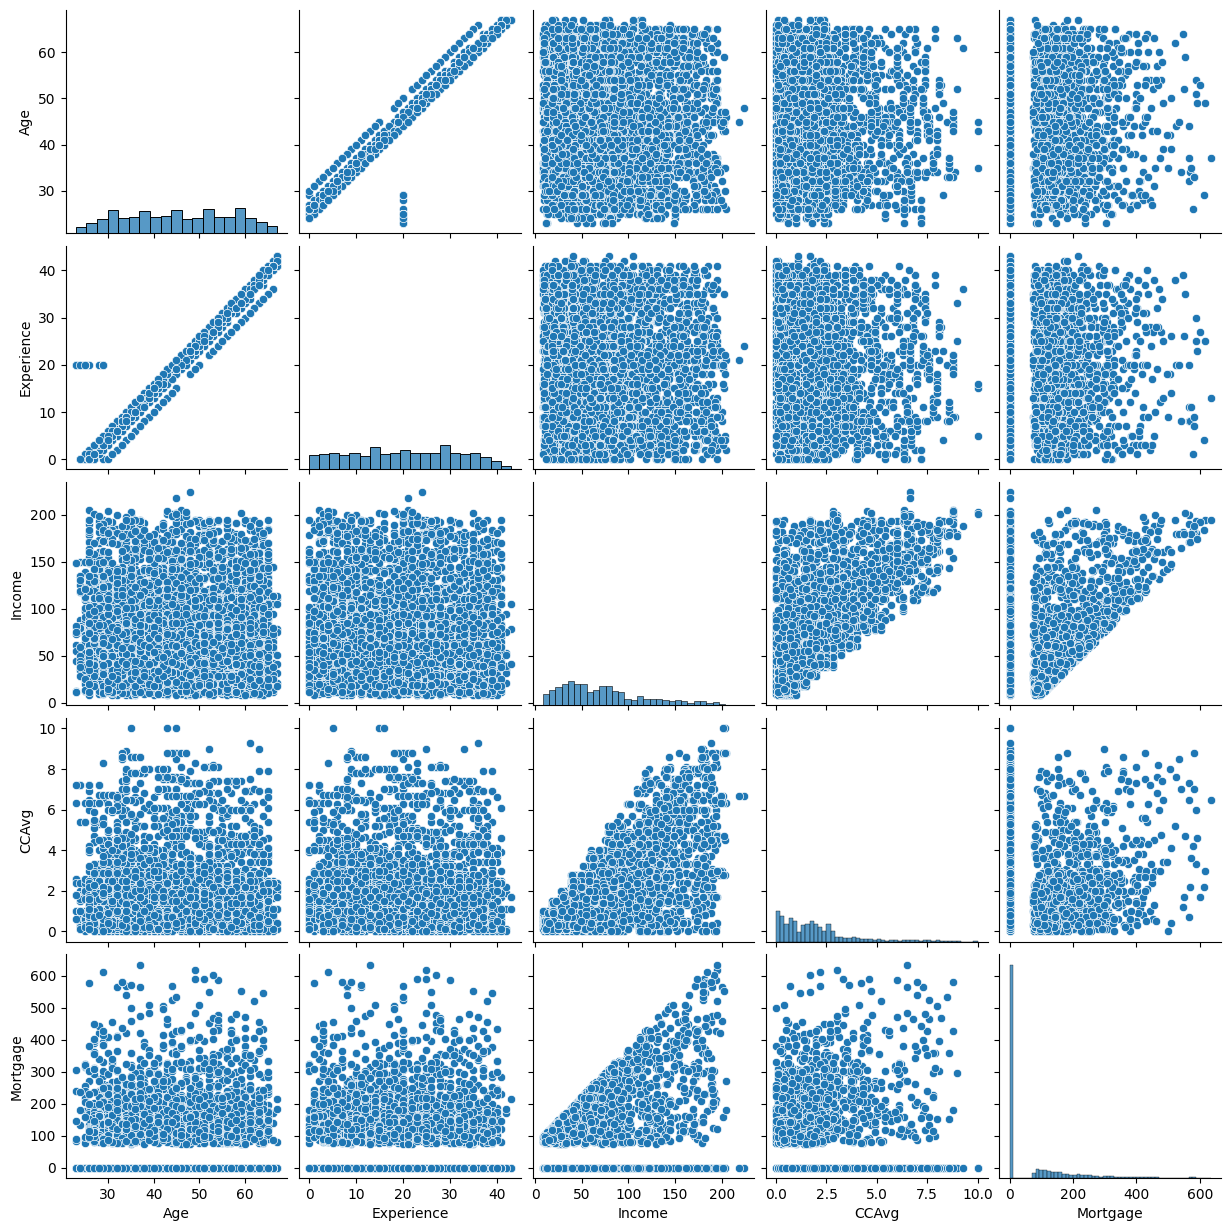

In [10]:
print(df.describe())
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
plt.show()

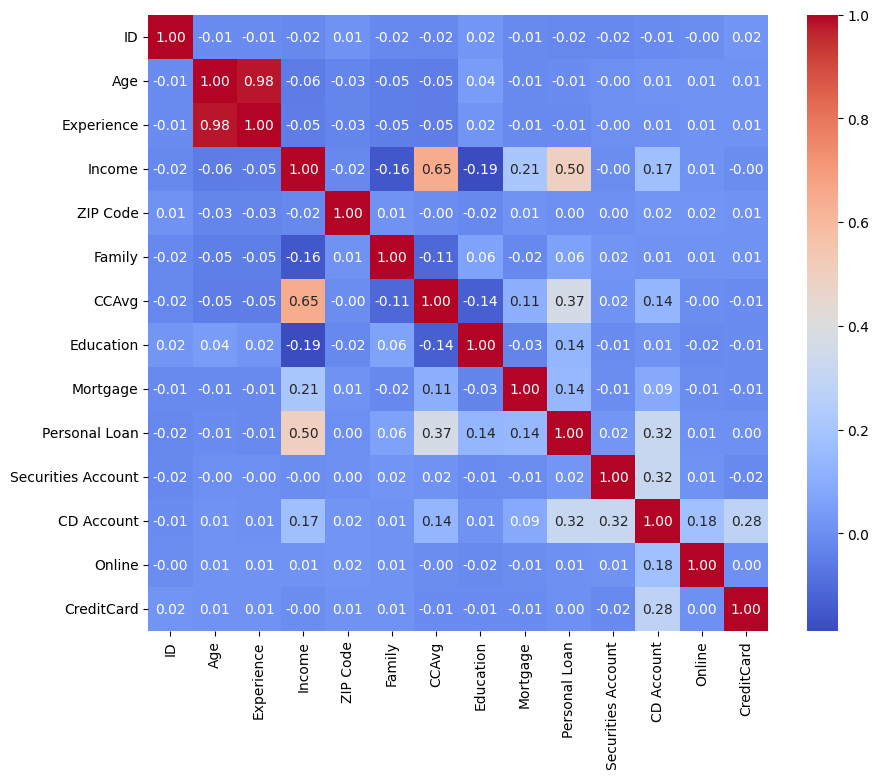

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [12]:
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

In [13]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [15]:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Validation set size: {X_val.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 4000 samples
Validation set size: 500 samples
Test set size: 500 samples


# **3. Identifikasi Tantangan dan Kesulitan**

Pada dataset ini, terdapat tantangan dalam pengolahannya, seperti kualitas data yang tidak baik dan jenis data pun beragam.
1. format pada CCAvg bermasalah
2. Terdapat nilai negatif pada kolom Experience
3. Perlu melakukan Encoding untuk fitur categorical, yaitu kolom Education
4. Ketidak seimbangan kelas, khususnya pada kolom Personal Loan.

Keempat hal tersebut dapat membuat nilai bias, maka dari itu untuk mengatasinya, harus dilakukan teknik resampling atau memilih metrik evaluasi yang lebih sesuai untuk data yang tidak seimbang. Dengan mengatasi masalah-masalah ini, kualitas model dan keakuratan hasil analisis dari dataset ini dapat  meningkat.

# **4.**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
def create_bpnn_model(n, num_class):
    model = Sequential()
    model.add(Dense(2 * n, input_shape=(n,), activation='relu'))
    model.add(Dense(2 * n, activation='relu'))
    model.add(Dense(num_class, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [18]:
model = create_bpnn_model(10, 3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 703 (2.75 KB)
Trainable params: 703 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **5.**
Pendekatan Dropout ini digunakan  untuk mencegah overfitting, terutama data tang digunakan memiliki banyak fitur/parameter. Lalu menggunakan SGD (Stochastic Gradient Descent) karena fungsi ini cenderung lebih stabil dan memberikan hasil yang lebih baik untuk data yang kompleks. terakhir, menggunakan learning rate yamg rendah agar kovergensi lebih stabil.

In [19]:
from tensorflow.keras.layers import Dropout

def create_optimized_model(n, num_class):
    model = Sequential()
    model.add(Dense(2 * n, input_shape=(n,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2 * n, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_class, activation='softmax'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model



# **6. Evaluasi**

Accuracy: 0.906 (90.6%)
Precision: 0.453
Recall: 0.5
F1 Score: 0.475

- Accuracy
Nilai akurasi 90.6% menunjukkan bahwa model yang dibuat sudah sangat baik dalam memprediksi label yang benar.
- Precision
Nilai presisi 0.453 (45.3%) ini sediki terlalu rendah, yang mengindikasikan bahwa ketika model memprediksi suatu kelas sebagai positif, hanya sekitar 45.3% dari prediksi tersebut yang benar-benar positif. Presisi yang rendah dapat menunjukkan tingkat false positive yang tinggi.
- Recall
Nila recall 0.5 (50%) menandakan bahwa model  berhasil mengidentifikasi 50% dari semua kasus positif yang sebenarnya dalam data. meski begitu, nilai recall lebih rendah dari presisi, yang mana hal ini menunjukkan bahwa ada banyak positif aktual yang tidak terdeteksi oleh model.
-F1 Score
F1 score 0.475 (47.5%) menandakan bahwa model kurang seimbang dalam hal presisi dan recall, yang mana dapat disimpulkan bahwa hasilnya kurang baik.

In [20]:
num_features = X_train.shape[1]
num_classes = 3

model = create_optimized_model(num_features, num_classes)

In [21]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [22]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
125/125 [==============================] - 1s 2ms/step - loss: 31198626.0000 - accuracy: 0.9028
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.9062
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.9062
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.9062
Epoch 5/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.9062
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.9062
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.9062
Epoch 8/50
125/125 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.9062
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.9062
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy:

In [23]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

16/16 [==============================] - 0s 1ms/step


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.906
Precision: 0.453
Recall: 0.5
F1 Score: 0.4753410283315844


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
